<a href="https://colab.research.google.com/github/fabeoebaf/DataScience/blob/main/Covid_19_Amazonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casos Covid-19 no Amazonas

### Importando as bibliotecas

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 

### Importando o dataset do github

In [3]:
# data a nível estadual

df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df.tail(10)

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
19100,204,2022-01-23,Brazil,RJ,TOTAL,0,69674,0,1602066,69674,1602066,403.55766,9279.30084,0.04349,1307974.0,52017.0,2313502.0,13399.99790,13116805.0,75.97364,11101803.0,64.30258,367911.0,2.13097,3086133.0,17.87514
19101,204,2022-01-23,Brazil,RN,TOTAL,0,7635,0,403321,7635,403321,217.71657,11500.93831,0.01893,256642.0,201457.0,1066514.0,30412.28132,2649672.0,75.55697,2361247.0,67.33236,59688.0,1.70204,753461.0,21.48539
19102,204,2022-01-23,Brazil,RO,TOTAL,0,6806,0,300120,6806,300120,382.95658,16887.00080,0.02268,270457.0,394865.0,1110979.0,62512.00608,1245646.0,70.08938,1054264.0,59.32080,37180.0,2.09203,210023.0,11.81747
19103,204,2022-01-23,Brazil,RR,TOTAL,0,2086,0,136403,2086,136403,344.36023,22517.62659,0.01529,126934.0,5095.0,355203.0,58637.48244,388533.0,64.13965,272886.0,45.04846,10964.0,1.80995,28420.0,4.69162
19104,204,2022-01-23,Brazil,RS,TOTAL,0,36635,0,1690598,36635,1690598,322.00255,14859.47513,0.02167,1501226.0,10647.0,6145500.0,54015.74143,8961491.0,78.76683,7969538.0,70.04808,305042.0,2.68116,2525169.0,22.19492
19105,204,2022-01-23,Brazil,SC,TOTAL,0,20361,0,1361502,20361,1361502,284.18147,19002.68368,0.01495,1241428.0,256088.0,2568392.0,35847.42493,5831650.0,81.39320,5031821.0,70.22987,261855.0,3.65475,1033884.0,14.43007
19106,204,2022-01-23,Brazil,SE,TOTAL,0,6072,0,282972,6072,282972,264.14976,12310.10973,0.02146,271802.0,445.0,604183.0,26283.72782,1763231.0,76.70571,1551410.0,67.49087,40125.0,1.74555,328956.0,14.31055
19107,204,2022-01-23,Brazil,SP,TOTAL,0,156434,0,4557842,156310,4545225,340.67343,9925.81967,0.03432,4270000.0,861453.0,19501783.0,42469.91918,38616471.0,84.09684,35928642.0,78.24344,1198361.0,2.60973,14420560.0,31.40431
19108,204,2022-01-23,Brazil,TO,TOTAL,0,3983,0,254144,3983,254144,253.23200,16158.01982,0.01567,230893.0,359.0,721136.0,45848.53382,1064365.0,67.67042,839015.0,53.34307,36976.0,2.35087,142791.0,9.07840
19109,204,2022-01-23,Brazil,TOTAL,TOTAL,0,623191,0,23931609,622801,23909175,292.14227,11218.76705,0.02604,21428115.0,8722636.0,66120342.0,30996.19062,163031381.0,76.42658,143550679.0,67.29433,4983611.0,2.33624,41180103.0,19.30459


In [4]:
# Checando as colunas do dataframe

df['date'] = pd.to_datetime(df['date'])
print(df.columns)


Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')


In [5]:
# Selecionando os casos para o Amazonas e filtrando as colunas

data_AM = df.query("state == 'AM'")[['date', 'state' ,'newCases', 'totalCases', 'deaths', 'newDeaths' , 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second']]
data_AM

,date,state,newCases,totalCases,deaths,newDeaths,suspects,recovered,tests,vaccinated,vaccinated_second
81,2020-03-13,AM,2,2,0,0,NaN,NaN,NaN,NaN,NaN
96,2020-03-14,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN
113,2020-03-15,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN
130,2020-03-16,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN
149,2020-03-17,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18972,2022-01-19,AM,7505,464913,13863,3,833.0,420707.0,1166605.0,2795047.0,2288993.0
19000,2022-01-20,AM,8319,473232,13869,6,3123.0,420707.0,1166605.0,2797121.0,2293024.0
19028,2022-01-21,AM,8063,481295,13881,12,3123.0,420707.0,1166605.0,2802608.0,2299489.0
19056,2022-01-22,AM,7467,488762,13881,0,3123.0,420707.0,1166605.0,2804498.0,2309079.0


In [6]:
# Adicionando e renomeando algumas categorias 

data_AM['Casos_Ativos'] = data_AM['totalCases'] - data_AM['deaths'] - data_AM['recovered']
data_AM['Novos_Vacinados'] = data_AM['vaccinated'].diff()
data_AM['Novos_Vacinados_SegundaDose'] = data_AM ['vaccinated_second'].diff()
data_AM.rename(columns={
    'date': 'Data', 'state': 'Estado', 'deaths': 'Mortes', 'totalCases': 'Casos_Total', 
    'newDeaths': 'Novas_Mortes', 'newCases': 'Novos_Casos','suspects': 'Suspeitos',
    'recovered': 'Recuperados', 'tests':'Testes', 'vaccinated':'Vacinados', 
    'vaccinated_second':'Vacinados_SegundaDose'}, 
    inplace=True)


data_AM

,Data,Estado,Novos_Casos,Casos_Total,Mortes,Novas_Mortes,Suspeitos,Recuperados,Testes,Vacinados,Vacinados_SegundaDose,Casos_Ativos,Novos_Vacinados,Novos_Vacinados_SegundaDose
81,2020-03-13,AM,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2020-03-14,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2020-03-15,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2020-03-16,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2020-03-17,AM,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18972,2022-01-19,AM,7505,464913,13863,3,833.0,420707.0,1166605.0,2795047.0,2288993.0,30343.0,2016.0,4714.0
19000,2022-01-20,AM,8319,473232,13869,6,3123.0,420707.0,1166605.0,2797121.0,2293024.0,38656.0,2074.0,4031.0
19028,2022-01-21,AM,8063,481295,13881,12,3123.0,420707.0,1166605.0,2802608.0,2299489.0,46707.0,5487.0,6465.0
19056,2022-01-22,AM,7467,488762,13881,0,3123.0,420707.0,1166605.0,2804498.0,2309079.0,54174.0,1890.0,9590.0


###Raking de mortos e casos por mês no estado do Amazonas


In [7]:
#Raking do número de mortes por mês no estado do Amazonas

ranking_mortes_mesAM = data_AM.groupby(data_AM['Data'].dt.strftime('%b/%y'))['Novas_Mortes'].sum().sort_values(ascending=False)
pd.DataFrame(ranking_mortes_mesAM)

,Novas_Mortes
Data,
Jan/21,2832
Feb/21,2743
May/20,1627
Mar/21,1155
Jun/20,771
Apr/21,612
Sep/20,507
Jul/20,445
Apr/20,422


In [8]:
#Raking do número de casos por mês no estado do Amazonas

ranking_casos_mesAM = data_AM.groupby(data_AM['Data'].dt.strftime('%b/%y'))['Novos_Casos'].sum().sort_values(ascending=False)
pd.DataFrame(ranking_casos_mesAM)

,Novos_Casos
Data,
Jan/21,66381
Jan/22,54949
Feb/21,48694
May/20,36124
Mar/21,33035
Jul/20,30117
Jun/20,29445
Dec/20,22813
Oct/20,22357


### Raking de número mortes e casos por dia no estado do Amazonas


In [9]:
#Raking do 20 dias com maior número de mortes no Amazonas

ranking_mortes_diaAM = data_AM.set_index("Data")['Novas_Mortes'].sort_values(ascending=False)
pd.DataFrame(ranking_mortes_diaAM).head(20)

,Novas_Mortes
Data,
2021-01-30,225
2021-01-26,192
2021-02-09,169
2021-02-11,167
2021-02-10,167
2021-01-23,162
2021-01-21,159
2020-09-02,158
2021-02-04,152


In [10]:
#Raking dos 20 dias com maior número de casos no Amazonas

ranking_casos_diaAM = data_AM.set_index("Data")['Novos_Casos'].sort_values(ascending=False)
pd.DataFrame(ranking_casos_diaAM).head(20)

,Novos_Casos
Data,
2022-01-20,8319
2022-01-21,8063
2022-01-19,7505
2022-01-22,7467
2021-01-20,5009
2022-01-18,4975
2021-01-30,4420
2021-01-22,3975
2021-01-14,3816


### Gráficos para o esdado do Amazonas

In [11]:
data_AM.tail()

,Data,Estado,Novos_Casos,Casos_Total,Mortes,Novas_Mortes,Suspeitos,Recuperados,Testes,Vacinados,Vacinados_SegundaDose,Casos_Ativos,Novos_Vacinados,Novos_Vacinados_SegundaDose
18972,2022-01-19,AM,7505,464913,13863,3,833.0,420707.0,1166605.0,2795047.0,2288993.0,30343.0,2016.0,4714.0
19000,2022-01-20,AM,8319,473232,13869,6,3123.0,420707.0,1166605.0,2797121.0,2293024.0,38656.0,2074.0,4031.0
19028,2022-01-21,AM,8063,481295,13881,12,3123.0,420707.0,1166605.0,2802608.0,2299489.0,46707.0,5487.0,6465.0
19056,2022-01-22,AM,7467,488762,13881,0,3123.0,420707.0,1166605.0,2804498.0,2309079.0,54174.0,1890.0,9590.0
19084,2022-01-23,AM,0,488762,13881,0,3123.0,420707.0,1166605.0,2804498.0,2309079.0,54174.0,0.0,0.0


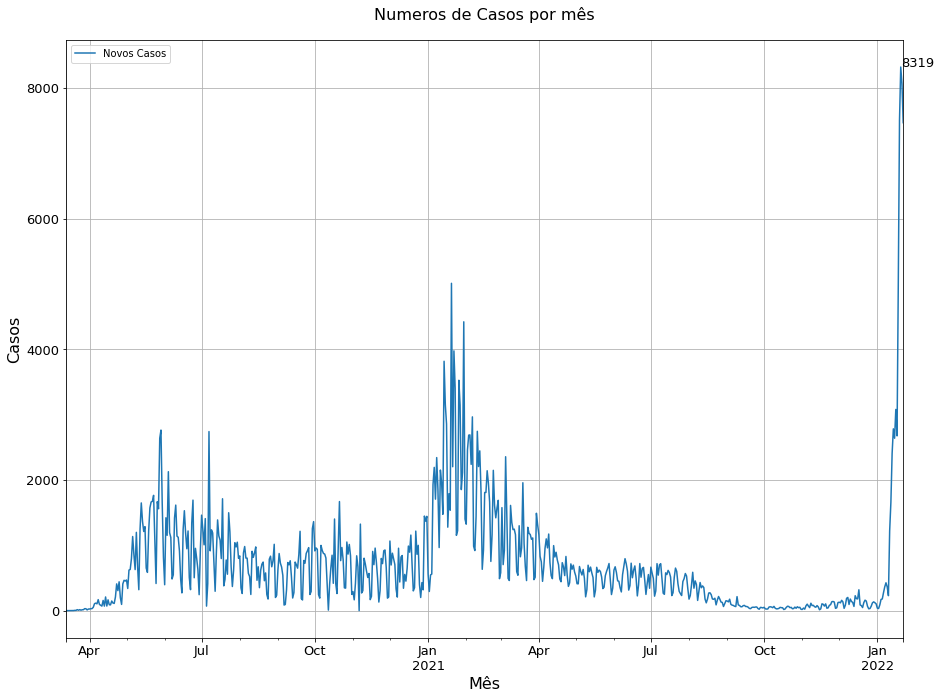

In [116]:
# Gráfico de número casos por mês

data_AM[:-1].plot(x='Data', y= 'Novos_Casos', figsize=(15,11))

recorde_novos_casosAM = data_AM['Novos_Casos'].max()

plt.title('Numeros de Casos por mês', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos', fontsize=16)
plt.yticks(size=13)
plt.grid(True)


plt.legend(['Novos Casos'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Novos_Casos'].idxmax()] 
y1 = max(data_AM['Novos_Casos'])
plt.annotate('{}'.format(recorde_novos_casosAM), xy=(x1,y1), fontsize=13)



plt.show()

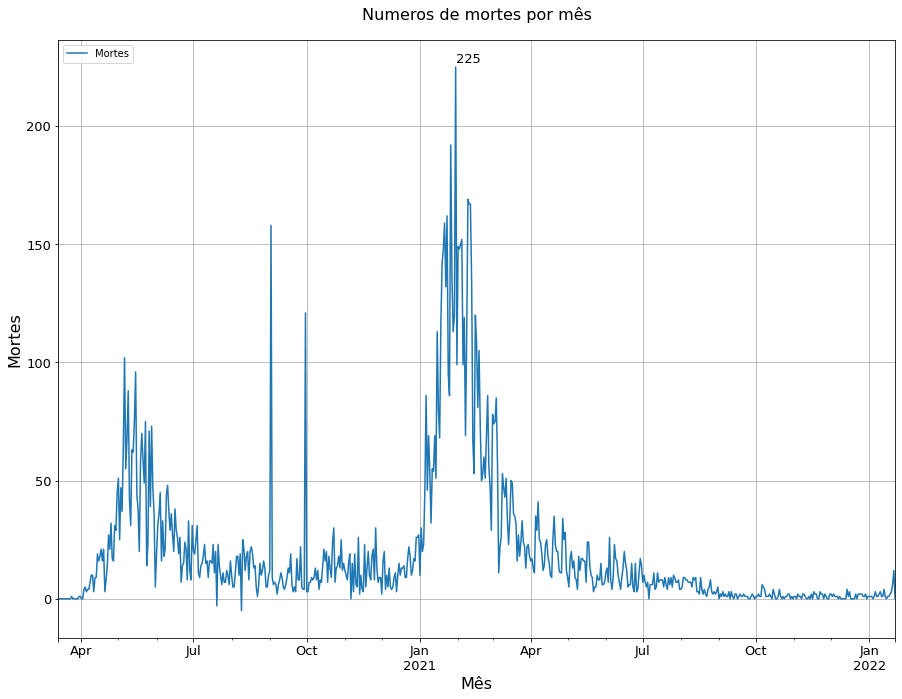

In [115]:
# Gráfico de numeros de mortes por mês

data_AM[:-1].plot(x='Data', y= 'Novas_Mortes', figsize=(15,11))

recorde_novos_mortesAM = data_AM['Novas_Mortes'].max()


plt.title('Numeros de mortes por mês', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Mortes', fontsize=16)
plt.yticks(size=13)
plt.grid(True)


plt.legend(['Mortes'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Novas_Mortes'].idxmax()]
y1 = max(data_AM['Novas_Mortes']) + 2
plt.annotate('{}'.format(recorde_novos_mortesAM), xy=(x1,y1), fontsize=13)

plt.show()

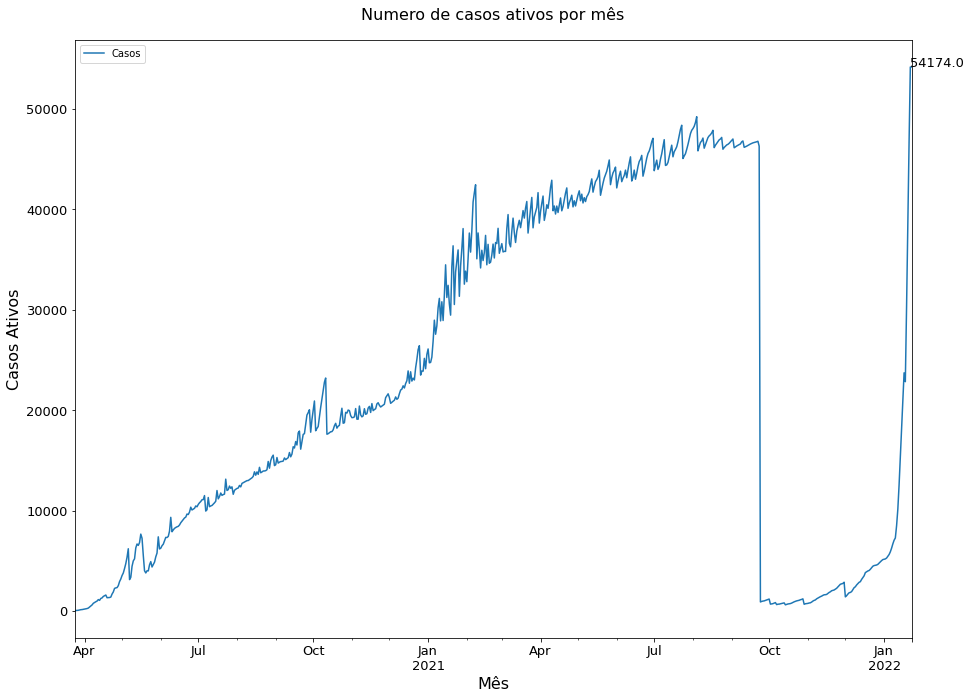

In [113]:
# Gráfico de Casos ativos no Amazonas

data_AM[~data_AM.Casos_Ativos.isna()].plot(x='Data', y='Casos_Ativos', figsize=(15,11))

recorde_casos_ativosAM = data_AM['Casos_Ativos'].max()


plt.title('Numero de casos ativos por mês', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos Ativos', fontsize=16)
plt.yticks(size=13)


plt.legend(['Casos'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Casos_Ativos'].idxmax()]
y1 = max(data_AM['Casos_Ativos'].dropna()) + 2
plt.annotate('{}'.format(recorde_casos_ativosAM), xy=(x1,y1), fontsize=13)

plt.show()

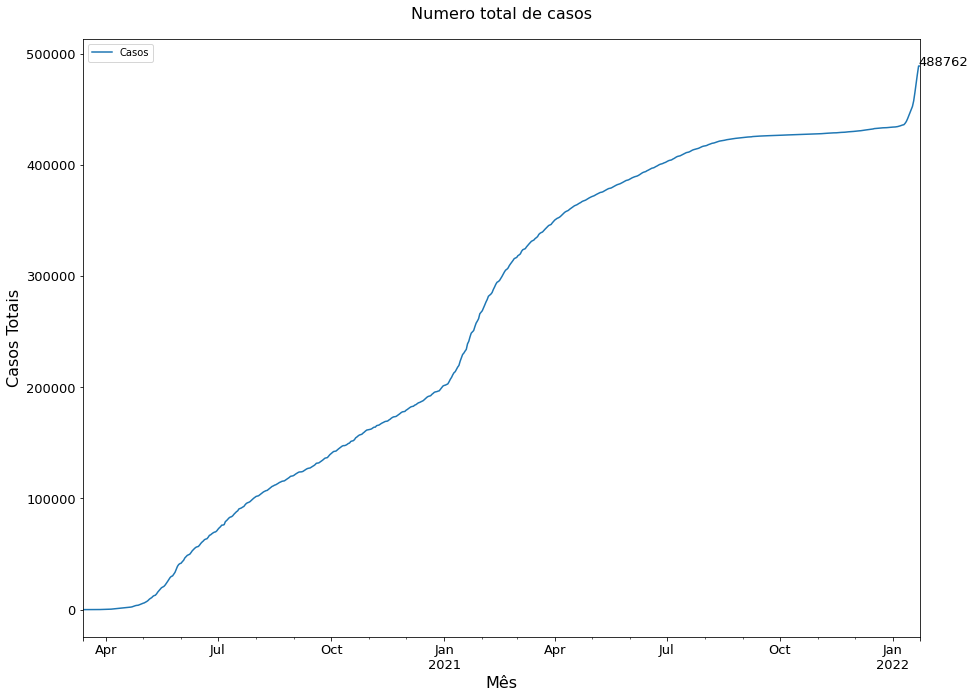

In [112]:
data_AM.plot(x='Data', y='Casos_Total', figsize=(15,11))

recorde_casos_totalAM = data_AM['Casos_Total'].max()


plt.title('Numero total de casos', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos Totais', fontsize=16)
plt.yticks(size=13)


plt.legend(['Casos'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Casos_Total'].idxmax()]
y1 = max(data_AM['Casos_Total']) + 2
plt.annotate('{}'.format(recorde_casos_totalAM), xy=(x1,y1), fontsize=13)

plt.show()

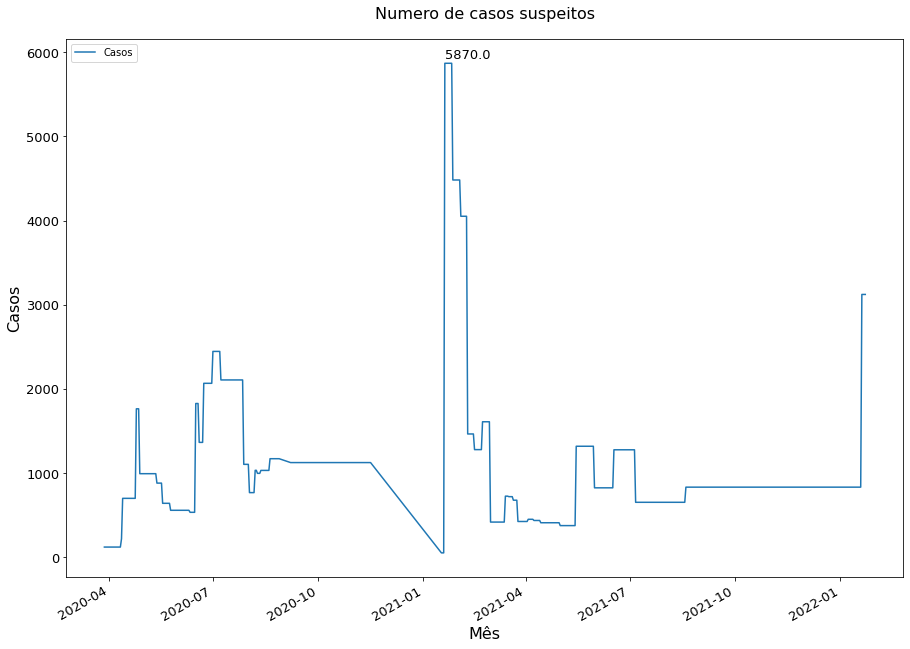

In [111]:
data_AM[~data_AM.Suspeitos.isna()].plot(x='Data', y='Suspeitos', figsize=(15,11))

recorde_casos_suspeitosAM = data_AM['Suspeitos'].max()


plt.title('Numero de casos suspeitos', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos', fontsize=16)
plt.yticks(size=13)


plt.legend(['Casos'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Suspeitos'].idxmax()]
y1 = max(data_AM['Suspeitos'].dropna()) + 50
plt.annotate('{}'.format(recorde_casos_suspeitosAM), xy=(x1,y1), fontsize=13)

plt.show()

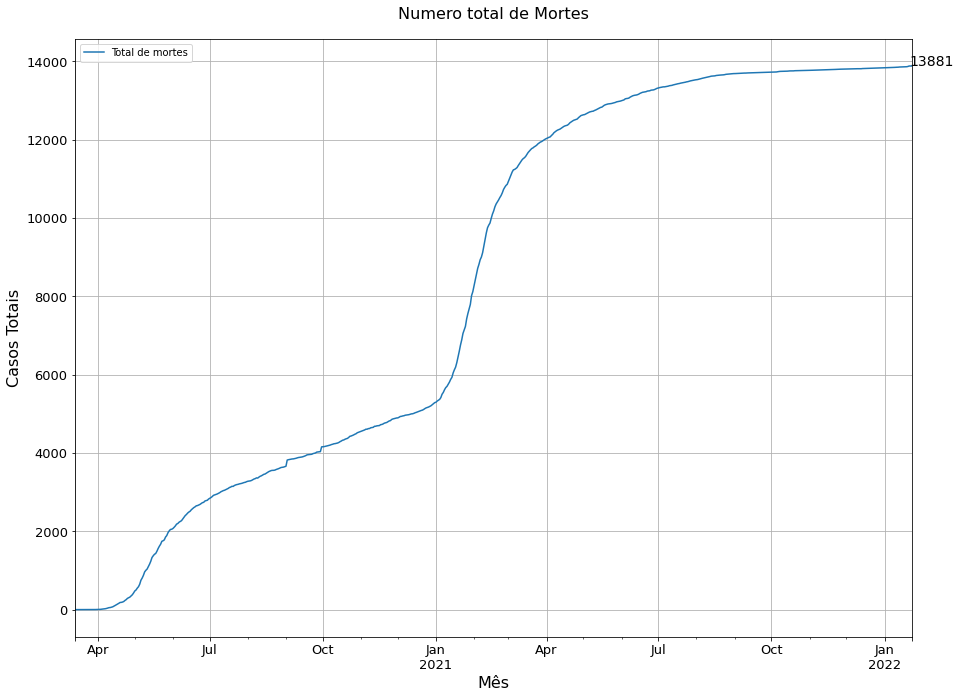

In [110]:
data_AM.plot(x='Data', y='Mortes', figsize=(15,11))

recorde_mortes_totalAM = data_AM['Mortes'].max()


plt.title('Numero total de Mortes', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos Totais', fontsize=16)
plt.yticks(size=13)
plt.grid(True)


plt.legend(['Total de mortes'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Mortes'].idxmax()]
y1 = max(data_AM['Mortes']) + 2
plt.annotate('{}'.format(recorde_mortes_totalAM), xy=(x1,y1), fontsize=14)

plt.show()

In [104]:
x1 = data_AM['Data'][data_AM['Recuperados'].idxmax()] - data_AM['Data'][:-1]
x1

81      676 days
96      675 days
113     674 days
130     673 days
149     672 days
          ...   
18944     0 days
18972    -1 days
19000    -2 days
19028    -3 days
19056    -4 days
Name: Data, Length: 681, dtype: timedelta64[ns]

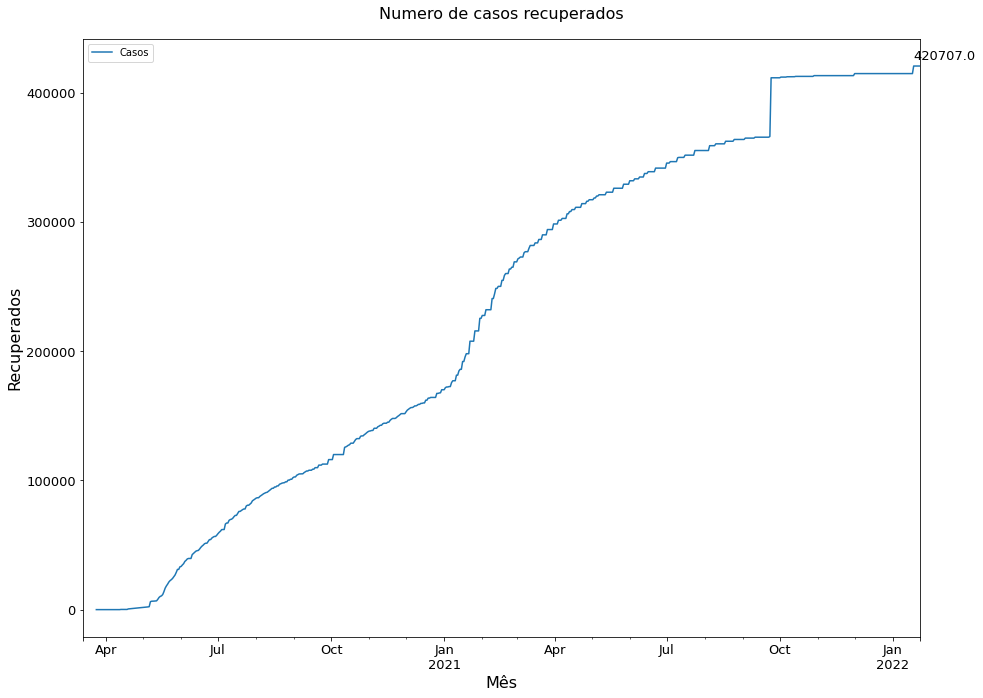

In [108]:
data_AM.plot(x='Data', y='Recuperados', figsize=(15,11))

recorde_casos_recuperadosAM = data_AM['Recuperados'].max()


plt.title('Numero de casos recuperados', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Recuperados', fontsize=16)
plt.yticks(size=13)


plt.legend(['Casos'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Recuperados'].idxmax()]
y1 = max(data_AM['Recuperados'].dropna() + 5000) 
plt.annotate(recorde_casos_recuperadosAM, xy=(x1,y1), fontsize=13)

plt.show()

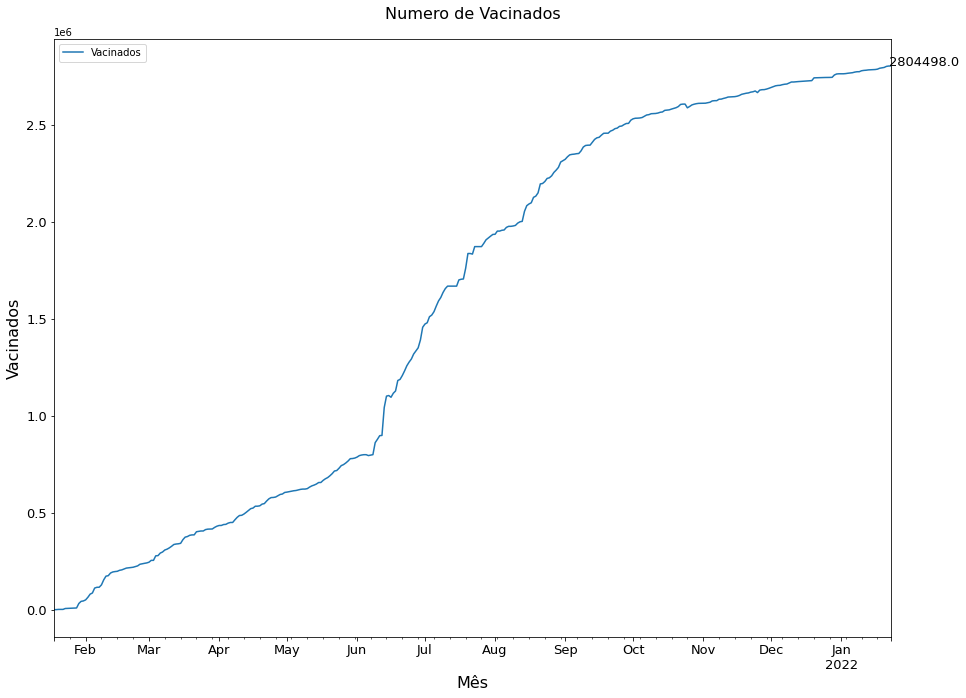

In [125]:
data_AM[~data_AM.Vacinados.isna()].plot(x='Data', y='Vacinados', figsize=(15,11))

recorde_vacinadosAM = data_AM['Vacinados'].max()


plt.title('Numero de Vacinados', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Vacinados', fontsize=16)
plt.yticks(size=13)


plt.legend(['Vacinados'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Vacinados'].idxmax()]
y1 = max(data_AM['Vacinados'].dropna()) 
plt.annotate(recorde_vacinadosAM, xy=(x1,y1), fontsize=13)

plt.show()

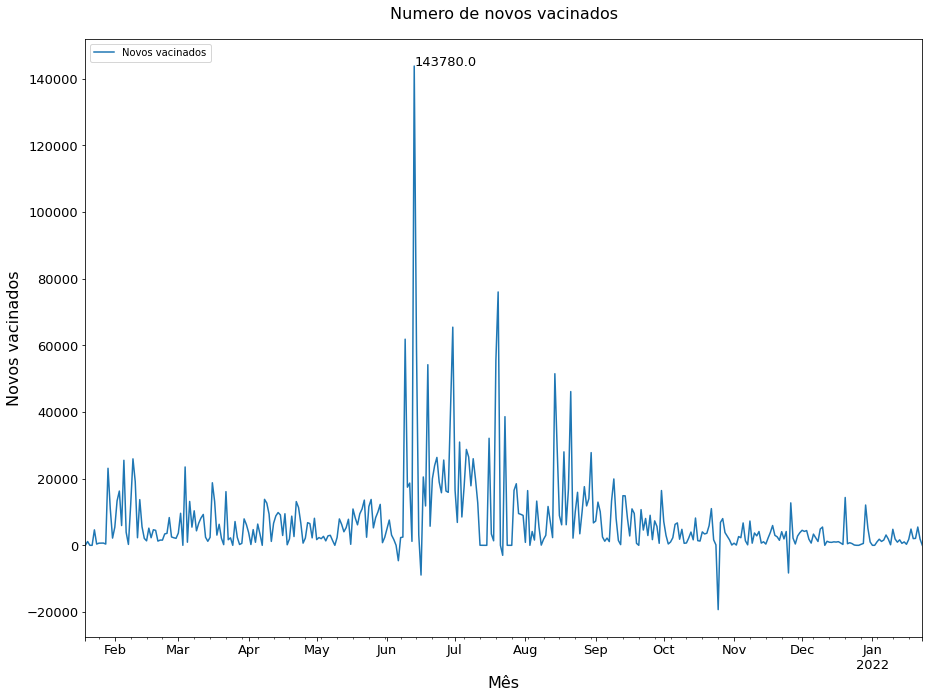

In [126]:
data_AM[~data_AM.Novos_Vacinados.isna()].plot(x='Data', y='Novos_Vacinados', figsize=(15,11))

recorde_novos_vacinadosAM = data_AM['Novos_Vacinados'].max()


plt.title('Numero de novos vacinados', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Novos vacinados', fontsize=16)
plt.yticks(size=13)


plt.legend(['Novos vacinados'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Novos_Vacinados'].idxmax()]
y1 = max(data_AM['Novos_Vacinados'].dropna()) 
plt.annotate(recorde_novos_vacinadosAM, xy=(x1,y1), fontsize=13)

plt.show()

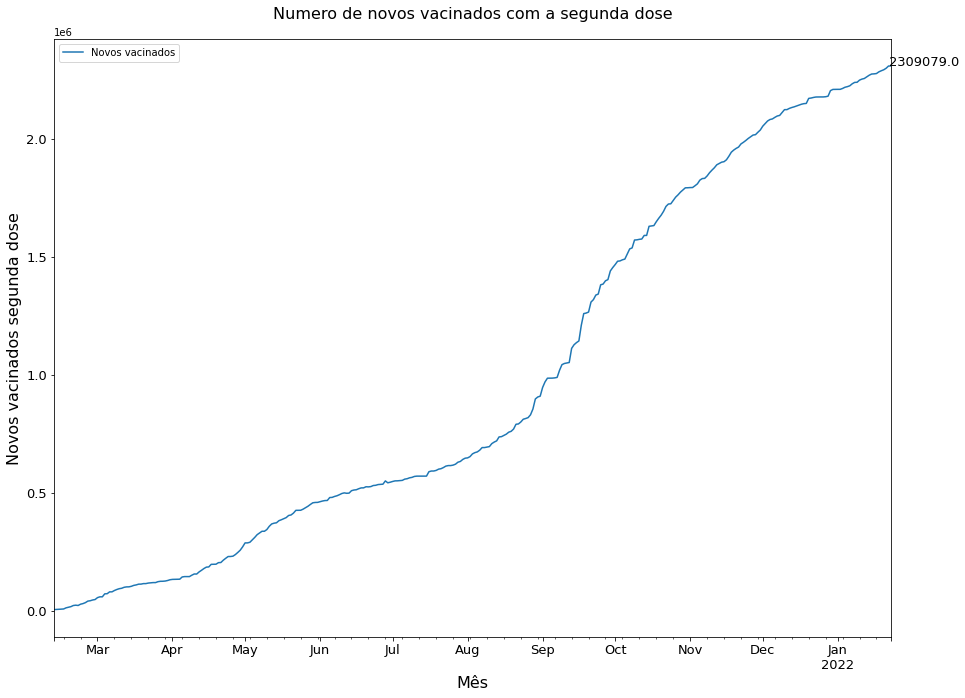

In [127]:
data_AM[~data_AM.Vacinados_SegundaDose.isna()].plot(x='Data', y='Vacinados_SegundaDose', figsize=(15,11))

recorde_vacinados_segundaDoseAM = data_AM['Vacinados_SegundaDose'].max()


plt.title('Numero de novos vacinados com a segunda dose', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Novos vacinados segunda dose', fontsize=16)
plt.yticks(size=13)


plt.legend(['Novos vacinados'], fontsize=10, loc='upper left')

x1 = data_AM['Data'][data_AM['Vacinados_SegundaDose'].idxmax()]
y1 = max(data_AM['Vacinados_SegundaDose'].dropna()) 
plt.annotate(recorde_vacinados_segundaDoseAM, xy=(x1,y1), fontsize=13)

plt.show()

# Casos Covid-19 em Manaus 

### Importando Dados a nível municipal




In [17]:

df_cities = pd.read_csv("https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true", compression='gzip')
df_cities['date'] = pd.to_datetime(df_cities['date'])
df_cities.tail(20)

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
3485887,204,2022-01-23,MG,Águas Formosas/MG,3100906,0,34,0,1167,176.303,6051.335,0.029
3485888,204,2022-01-23,SC,Águas Frias/SC,4200556,0,4,0,691,170.867,29517.300,0.006
3485889,204,2022-01-23,GO,Águas Lindas de Goiás/GO,5200258,0,365,0,10081,163.787,4523.671,0.036
3485890,204,2022-01-23,SC,Águas Mornas/SC,4200606,0,10,0,903,150.466,13587.120,0.011
3485891,204,2022-01-23,MG,Águas Vermelhas/MG,3101003,0,11,0,469,80.551,3434.388,0.023
3485892,204,2022-01-23,SP,Águas da Prata/SP,3500402,0,30,0,816,363.108,9876.543,0.037
3485893,204,2022-01-23,SC,Águas de Chapecó/SC,4200507,0,11,0,684,168.093,10452.323,0.016
3485894,204,2022-01-23,SP,Águas de Lindóia/SP,3500501,0,53,0,2485,280.305,13142.585,0.021
3485895,204,2022-01-23,SP,Águas de Santa Bárbara/SP,3500550,0,19,0,607,309.345,9882.774,0.031
3485896,204,2022-01-23,SP,Águas de São Pedro/SP,3500600,0,13,0,466,362.319,12987.737,0.028


### Checando e filtrando colunas 


In [18]:
df_cities.columns

Index(['epi_week', 'date', 'state', 'city', 'ibgeID', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deaths_per_100k_inhabitants',
       'totalCases_per_100k_inhabitants', 'deaths_by_totalCases'],
      dtype='object')

In [19]:
# Filtrando Columanos para cidade de Manaus

data_MAO = df_cities.query("city == 'Manaus/AM'")[['date', 'city' , 'newDeaths', 'deaths', 'newCases', 'totalCases']]
data_MAO

,date,city,newDeaths,deaths,newCases,totalCases
128,2020-03-13,Manaus/AM,0,0,2,2
162,2020-03-14,Manaus/AM,0,0,0,2
198,2020-03-15,Manaus/AM,0,0,0,2
238,2020-03-16,Manaus/AM,0,0,0,2
290,2020-03-17,Manaus/AM,0,0,0,2
...,...,...,...,...,...,...
3460793,2022-01-19,Manaus/AM,2,9527,3401,226225
3466390,2022-01-20,Manaus/AM,4,9531,3520,229745
3471987,2022-01-21,Manaus/AM,9,9540,3009,232754
3477584,2022-01-22,Manaus/AM,1,9541,2971,235725


In [20]:
data_MAO.rename(columns={'date':'Data', 'city':'Cidade', 'newDeaths':'novasMortes',
                         'deaths':'Mortes', 'newCases':'novosCasos', 'totalCases':'totalCasos', 
    },   inplace=True)
data_MAO.tail(20)

,Data,Cidade,novasMortes,Mortes,novosCasos,totalCasos
3376838,2022-01-04,Manaus/AM,0,9515,62,206496
3382435,2022-01-05,Manaus/AM,0,9515,83,206579
3388032,2022-01-06,Manaus/AM,1,9516,181,206760
3393629,2022-01-07,Manaus/AM,0,9516,262,207022
3399226,2022-01-08,Manaus/AM,0,9516,267,207289
3404823,2022-01-09,Manaus/AM,2,9518,339,207628
3410420,2022-01-10,Manaus/AM,0,9518,161,207789
3416017,2022-01-11,Manaus/AM,0,9518,1026,208815
3421614,2022-01-12,Manaus/AM,0,9518,1483,210298
3427211,2022-01-13,Manaus/AM,2,9520,1908,212206


### Ranking de mortes e casos por mês em Manaus

In [21]:
ranking_mortes_mesMAO = data_MAO.groupby(data_MAO['Data'].dt.strftime('%b/%y'))['novasMortes'].sum().sort_values(ascending=False)
pd.DataFrame(ranking_mortes_mesMAO)

,novasMortes
Data,
Jan/21,2195
Feb/21,2118
May/20,1054
Mar/21,727
Jun/20,424
Oct/20,373
Apr/21,356
Apr/20,310
Sep/20,268


In [22]:
ranking_casos_mesMAO = data_MAO.groupby(data_MAO['Data'].dt.strftime('%b/%y'))['novosCasos'].sum().sort_values(ascending=False)
pd.DataFrame(ranking_casos_mesMAO)

,novosCasos
Data,
Jan/21,37942
Jan/22,29343
Feb/21,26197
May/20,15020
Mar/21,13591
Oct/20,11757
Dec/20,11419
Jul/21,10317
Jun/21,9641


In [23]:
ranking_mortes_diaMAO = data_MAO.set_index("Data")['novasMortes'].sort_values(ascending=False)
pd.DataFrame(ranking_mortes_diaMAO).head(10)

,novasMortes
Data,
2021-01-30,183
2020-09-02,148
2021-02-11,141
2021-02-10,139
2021-02-09,137
2021-01-26,132
2021-01-21,131
2021-01-23,129
2021-02-04,123


In [24]:
ranking_casos_diaMAO = data_MAO.set_index("Data")['novosCasos'].sort_values(ascending=False)
pd.DataFrame(ranking_casos_diaMAO).head(10)

,novosCasos
Data,
2021-01-20,3632
2022-01-20,3520
2022-01-19,3401
2021-01-30,3315
2022-01-21,3009
2022-01-22,2971
2021-01-22,2919
2021-01-14,2516
2022-01-18,2481


### Gráfico para cidade de Manaus

In [25]:
data_MAO.tail()

,Data,Cidade,novasMortes,Mortes,novosCasos,totalCasos
3460793,2022-01-19,Manaus/AM,2,9527,3401,226225
3466390,2022-01-20,Manaus/AM,4,9531,3520,229745
3471987,2022-01-21,Manaus/AM,9,9540,3009,232754
3477584,2022-01-22,Manaus/AM,1,9541,2971,235725
3483181,2022-01-23,Manaus/AM,0,9541,0,235725


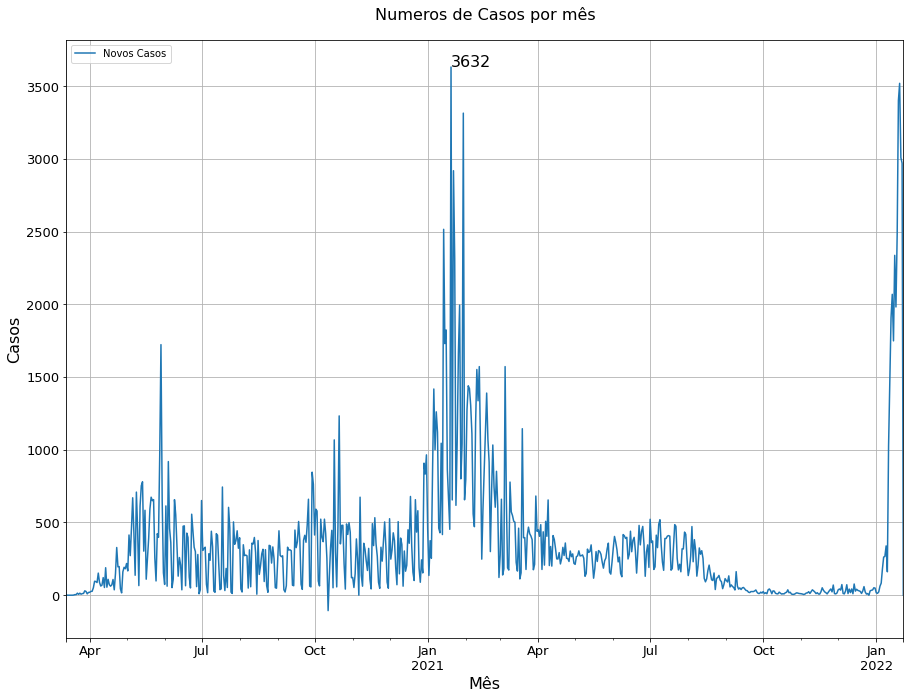

In [26]:
# Gráfico de Número de casos por mês

data_MAO.plot(x='Data', y= 'novosCasos', figsize=(15,11))

recorde_novos_casosMAO = data_MAO['novosCasos'].max()

plt.title('Numeros de Casos por mês', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos', fontsize=16)
plt.yticks(size=13)
plt.grid(True)

plt.legend(['Novos Casos'], fontsize=10, loc='upper left')

x1 = data_MAO['Data'][data_MAO['novosCasos'].idxmax()] 
y1 = max(data_MAO['novosCasos'])
plt.annotate('{}'.format(recorde_novos_casosMAO), xy=(x1,y1), fontsize=16)



plt.show()

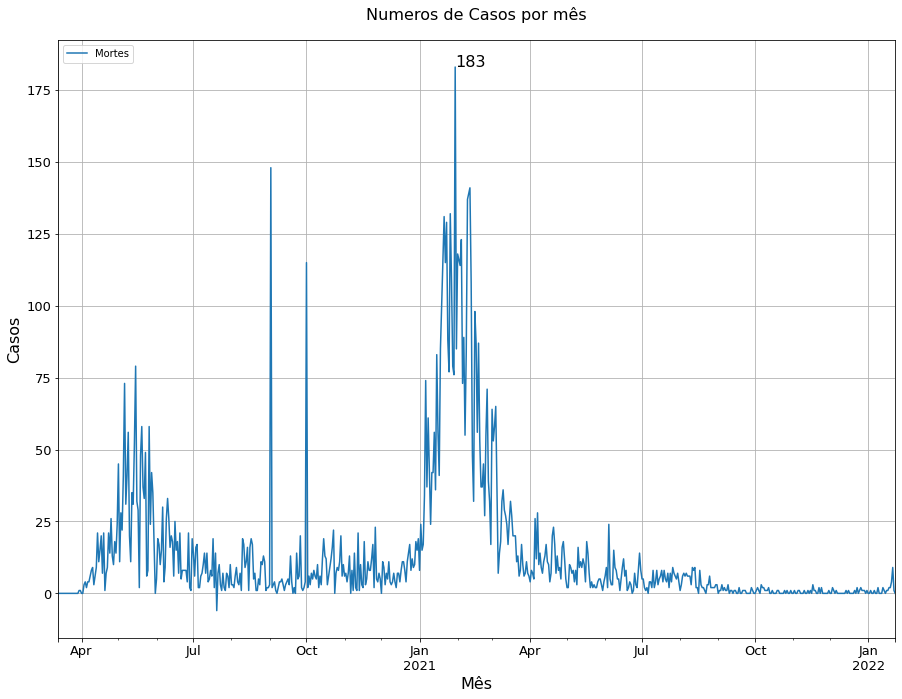

In [27]:
data_MAO.plot(x='Data', y= 'novasMortes', figsize=(15,11))

recorde_novos_mortessMAO = data_MAO['novasMortes'].max()

plt.title('Numeros de Casos por mês', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=16)
plt.xticks(size=13)
plt.ylabel('Casos', fontsize=16)
plt.yticks(size=13)
plt.grid(True)


plt.legend(['Mortes'], fontsize=10, loc='upper left')

x1 = data_MAO['Data'][data_MAO['novasMortes'].idxmax()] 
y1 = max(data_MAO['novasMortes'])
plt.annotate('{}'.format(recorde_novos_mortessMAO), xy=(x1,y1), fontsize=16)



plt.show()